In [ ]:
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

     |████████████████████████████████| 994 kB 19.4 MB/s 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0  1016k      0 --:--:-- --:--:-- --:--:-- 1014k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for

In [ ]:
!pip install geopandas 
import geopandas

     |████████████████████████████████| 1.0 MB 17.9 MB/s 
     |████████████████████████████████| 16.7 MB 350 kB/s 
     |████████████████████████████████| 6.3 MB 36.0 MB/s 


In [ ]:
!pip install contextily
import contextily as ctx

     |████████████████████████████████| 19.3 MB 1.3 MB/s 


In [ ]:
import pandas as pd 

In [ ]:
stradario = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/stradario.csv")
areesosta = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/bike_areesosta.zip")
quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm")

In [ ]:
stradario 

,CODICE_VIA,AREA,DESCRIZIONE_VIA,CIVICO,BARRATO,CAP,SEZIONE,MUNICIPIO
0,4377,VIA,8 OTTOBRE 2001,12,NaN,138,916,4
1,3123,VIA,A.DEL SARTO,1,NaN,129,665,3
2,3123,VIA,A.DEL SARTO,3,NaN,129,665,3
3,3123,VIA,A.DEL SARTO,4,NaN,129,665,3
4,3123,VIA,A.DEL SARTO,5,NaN,129,665,3
...,...,...,...,...,...,...,...,...
51318,6318,VIA,ZURIGO,24,NaN,147,394,7
51319,6318,VIA,ZURIGO,24,4,147,394,7
51320,6318,VIA,ZURIGO,25,NaN,147,1412,6
51321,6318,VIA,ZURIGO,28,NaN,147,539,7


In [ ]:
areesosta

,id_amat,id_via,num_civico,municipio,stato,categoriev,numero_man,stalli_per,stalli_tot,tipomanufa,ubicazione,geometry
0,2,5339,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (9.17821 45.42991)
1,4,1545,21,9,Esistente,Velocipedi,2,5,10,0_Non precisato,Alla quota della carreggiata,POINT (9.16829 45.51697)
2,8,6330,42,7,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.08480 45.47628)
3,9,7165,4,8,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.15673 45.48228)
4,10,6660,5,6,Esistente,Velocipedi,1,4,4,0_Non precisato,Marciapiede,POINT (9.12054 45.45506)
...,...,...,...,...,...,...,...,...,...,...,...,...
1517,3232,1242,72,9,Esistente,Velocipedi,3,4,12,Triangolare,Cortile o altro spazio collegato al civico,POINT (9.16586 45.50530)
1518,3233,1242,72,9,Esistente,Velocipedi,5,2,10,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16628 45.50584)
1519,3234,1242,72,9,Esistente,Velocipedi,6,2,12,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16634 45.50568)
1520,3235,1242,72,9,Esistente,Velocipedi,29,2,58,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16633 45.50532)


In [ ]:
quartieri 

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


- una lista (elenco) delle aree di sosta, indicando il nome della via, il numero civico e il numero di posti totali per le biciclette

In [ ]:
areesosta["id_via"] = areesosta["id_via"].astype(str)
stradario["CODICE_VIA"] = stradario["CODICE_VIA"].astype(str)

In [ ]:
df_areesosta_stradario = pd.merge(areesosta,stradario,how="inner",left_on="id_via", right_on="CODICE_VIA")
df_areesosta_stradario[["DESCRIZIONE_VIA","num_civico","stalli_tot"]]

,DESCRIZIONE_VIA,num_civico,stalli_tot
0,ABBIATEGRASSO,0,15
1,ABBIATEGRASSO,0,15
2,ABBIATEGRASSO,0,15
3,ABBIATEGRASSO,0,15
4,ABBIATEGRASSO,0,15
...,...,...,...
39919,SAN DIONIGI,36,30
39920,SAN DIONIGI,36,30
39921,SAN DIONIGI,36,30
39922,SAN DIONIGI,36,30


- una lista (elenco) analogo al precedente ma con anche  l'indicazione del quartiere

In [ ]:
df_areesosta_stradario_quartieri = geopandas.sjoin(df_areesosta_stradario,quartieri,op="within",how="left")
df_areesosta_stradario_quartieri[["DESCRIZIONE_VIA","num_civico","stalli_tot","NIL"]]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,DESCRIZIONE_VIA,num_civico,stalli_tot,NIL
0,ABBIATEGRASSO,0,15,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
1,ABBIATEGRASSO,0,15,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
2,ABBIATEGRASSO,0,15,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
3,ABBIATEGRASSO,0,15,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
4,ABBIATEGRASSO,0,15,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
...,...,...,...,...
39919,SAN DIONIGI,36,30,SCALO ROMANA
39920,SAN DIONIGI,36,30,SCALO ROMANA
39921,SAN DIONIGI,36,30,SCALO ROMANA
39922,SAN DIONIGI,36,30,SCALO ROMANA


- i nomi dei quartieri in cui non ci sono aree di sosta;

In [ ]:
quartieri[~quartieri["NIL"].isin(df_areesosta_stradario_quartieri["NIL"])]

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
5,63,FIGINO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5622.522341,1.424660e+06,94,"POLYGON ((9.08375 45.48485, 9.08280 45.48521, ..."
22,75,STEPHENSON,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3582.570059,5.600844e+05,111,"POLYGON ((9.13009 45.50820, 9.13016 45.50784, ..."
23,47,CANTALUPA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5161.415348,9.266817e+05,112,"POLYGON ((9.16112 45.42589, 9.16270 45.42544, ..."
24,39,QUINTOSOLE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6740.830821,1.058525e+06,113,"POLYGON ((9.21047 45.39699, 9.21039 45.39698, ..."
28,88,PARCO BOSCO IN CITTA',05/02/2020,Vigente,Milano 2030 - PGT Approvato,37072.981211,7.834006e+06,117,"POLYGON ((9.07309 45.50604, 9.07326 45.50589, ..."
36,87,ASSIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,16203.755410,5.840942e+06,125,"POLYGON ((9.04687 45.46276, 9.04688 45.46276, ..."
46,40,RONCHETTO DELLE RANE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,2223.117187,1.888634e+05,135,"POLYGON ((9.18364 45.40122, 9.18442 45.40004, ..."
48,31,MONLUE' - PONTE LAMBRO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9835.924371,2.629018e+06,137,"POLYGON ((9.27271 45.46079, 9.27276 45.46072, ..."
54,34,CHIARAVALLE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,2927.691044,3.094942e+05,143,"POLYGON ((9.24507 45.41742, 9.24303 45.41508, ..."


- una mappa di Milano con l'indicazione dei quartieri in cui non ci sono aree di sosta

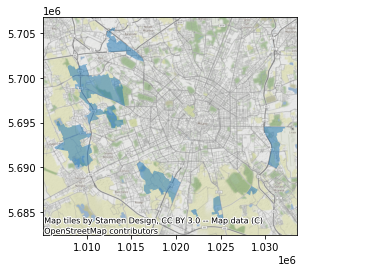

In [ ]:
ax = quartieri[~quartieri["NIL"].isin(df_areesosta_stradario_quartieri["NIL"])].to_crs(epsg=3857).plot(alpha=0.5)
ctx.add_basemap(ax)

- il nome del quartiere con più aree di sosta;

In [ ]:
df_areesosta_stradario_quartieri.groupby("NIL")["stalli_tot"].count()
quartiereMax = df_areesosta_stradario_quartieri.groupby("NIL")["stalli_tot"].count()[df_areesosta_stradario_quartieri.groupby("NIL")["stalli_tot"].count() == df_areesosta_stradario_quartieri.groupby("NIL")["stalli_tot"].count().max()]
quartiereMax

NIL
LORETO - CASORETTO - NOLO    4090
Name: stalli_tot, dtype: int64

 - una mappa di Milano con l'indicazione del quartiere con più aree di sosta;

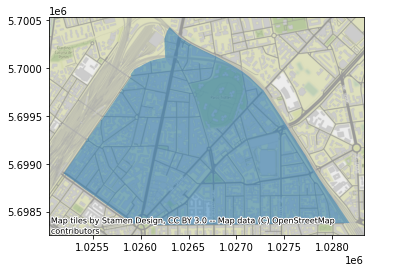

In [ ]:
ax = quartieri[quartieri.NIL.isin(quartiereMax.index)].to_crs(epsg=3857).plot(alpha=0.5)
ctx.add_basemap(ax)

- i nomi dei quartieri con un numero di aree di sosta minori della media;

In [ ]:
quartieriMin = df_areesosta_stradario_quartieri.groupby("NIL")["stalli_tot"].count()[df_areesosta_stradario_quartieri.groupby("NIL")["stalli_tot"].count() < df_areesosta_stradario_quartieri.groupby("NIL")["stalli_tot"].count().mean()]
quartieriMin

NIL
ADRIANO                                                    99
AFFORI                                                    491
BANDE NERE                                                444
BARONA                                                    236
BICOCCA                                                   401
BOVISA                                                    395
BOVISASCA                                                 146
BRUZZANO                                                  130
COMASINA                                                   20
DE ANGELI - MONTE ROSA                                    454
DERGANO                                                   354
FARINI                                                     64
GHISOLFA                                                  189
GIAMBELLINO                                               357
GIARDINI P.TA VENEZIA                                     336
GRATOSOGLIO - Q.RE MISSAGLIA - Q.RE TERRAZZE              220
GREC

- una mappa di Milano con l'indicazione  dei quartieri con un numero di aree di sosta minori della media;

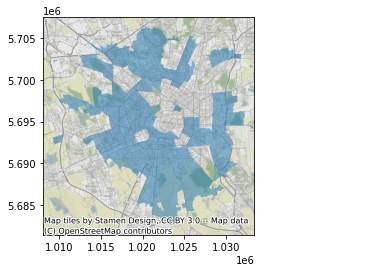

In [ ]:
ax = quartieri[quartieri.NIL.isin(quartieriMin.index)].to_crs(epsg=3857).plot(alpha=0.5)
ctx.add_basemap(ax)

- una mappa di Milano con i diversi quartieri contornati in nero e l'indicazione delle aree di sosta, sottoforma di punti rossi;

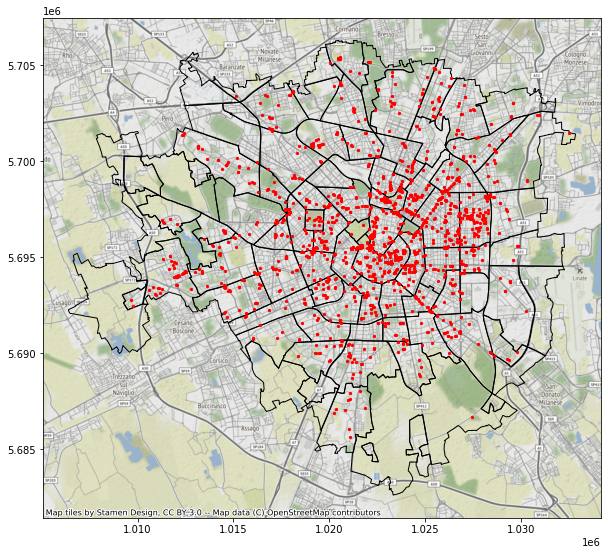

In [ ]:
ax = quartieri.to_crs(epsg=3857).plot(figsize=(10,10),facecolor="none",edgecolor="k")
areesosta.to_crs(epsg=3857).plot(ax=ax,facecolor="r",markersize=5)
ctx.add_basemap(ax)

- una mappa di Milano con i diversi quartieri colorati a seconda del numero di aree di sosta presenti, con una legenda che indichi il significato dei colori;

In [ ]:
quartieri2 = quartieri[["NIL","geometry"]]
quartieri2

,NIL,geometry
0,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,TRENNO,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,PORTELLO,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,BOVISASCA,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,PARCO NORD,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...
83,PAGANO,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,BRERA,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,ROGOREDO - SANTA GIULIA,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,ADRIANO,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


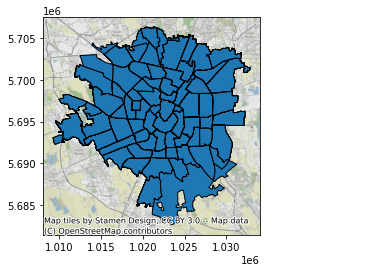

In [ ]:
df_quartieri_areesosta = geopandas.sjoin(areesosta,quartieri,op="within",how="left")
df_quartieri_areesosta = df_quartieri_areesosta.drop(columns="geometry")
df_quartieri_areesosta_geom = pd.merge(df_quartieri_areesosta,quartieri2,how="inner",on="NIL")
ax = df_quartieri_areesosta_geom.to_crs(epsg=3857).plot(edgecolor="k")
ctx.add_basemap(ax)

In [ ]:
areeQuartieri = df_quartieri_areesosta_geom.groupby("NIL").count()["id_amat"].reset_index()
areeQuartieri = areeQuartieri.rename(columns={"id_amat":"numero_aree"})
areeQuartieri

,NIL,numero_aree
0,ADRIANO,5
1,AFFORI,11
2,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,31
3,BANDE NERE,21
4,BARONA,14
...,...,...
71,TRIULZO SUPERIORE,1
72,UMBRIA - MOLISE - CALVAIRATE,16
73,VIGENTINO - Q.RE FATIMA,12
74,VILLAPIZZONE - CAGNOLA - BOLDINASCO,14


In [ ]:
df_quartieri_areesosta_geom = pd.merge(df_quartieri_areesosta_geom,areeQuartieri,how="inner",on="NIL")

In [ ]:
df_quartieri_areesosta_geom

,id_amat,id_via,num_civico,municipio,stato,categoriev,numero_man,stalli_per,stalli_tot,tipomanufa,ubicazione,index_right,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry,numero_aree
0,2,5339,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,59.0,42.0,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8831.940397,3.232115e+06,148.0,"POLYGON ((9.18775 45.43732, 9.18941 45.43729, ...",20
1,55,5438,6,5,Esistente,Velocipedi,3,5,15,Verona _ Ambrogio,Cortile o altro spazio collegato al civico,59.0,42.0,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8831.940397,3.232115e+06,148.0,"POLYGON ((9.18775 45.43732, 9.18941 45.43729, ...",20
2,164,5438,1,5,Esistente,Velocipedi,1,5,5,Verona _ Ambrogio,Cortile o altro spazio collegato al civico,59.0,42.0,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8831.940397,3.232115e+06,148.0,"POLYGON ((9.18775 45.43732, 9.18941 45.43729, ...",20
3,170,5323,24,5,Esistente,Velocipedi,1,5,5,Verona _ Ambrogio,Cortile o altro spazio collegato al civico,59.0,42.0,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8831.940397,3.232115e+06,148.0,"POLYGON ((9.18775 45.43732, 9.18941 45.43729, ...",20
4,180,5341,52,5,Esistente,Velocipedi,3,5,15,Verona _ Ambrogio,Cortile o altro spazio collegato al civico,59.0,42.0,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8831.940397,3.232115e+06,148.0,"POLYGON ((9.18775 45.43732, 9.18941 45.43729, ...",20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,1812,1697,None,9,Esistente,"Condivisa (Velocipedi, Motocicli e Ciclomotori)",11,2,22,Archetto Milano _ Acciaio inox _ Passo cm 80,Alla quota della carreggiata,4.0,84.0,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93.0,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...",3
1509,1813,1697,None,9,Esistente,"Condivisa (Velocipedi, Motocicli e Ciclomotori)",7,2,14,Archetto Milano _ Acciaio inox _ Passo cm 80,Alla quota della carreggiata,4.0,84.0,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93.0,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...",3
1510,2847,1746,None,9,Esistente,"Condivisa (Velocipedi, Motocicli e Ciclomotori)",15,2,30,Archetto Milano _ Acciaio inox _ Passo cm 80,Alla quota della carreggiata,4.0,84.0,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93.0,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...",3
1511,2394,7465,75,8,Esistente,"Condivisa (Velocipedi, Motocicli e Ciclomotori)",16,2,32,Archetto Milano _ Acciaio inox _ Passo cm 80,Alla quota della carreggiata,45.0,74.0,ROSERIO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6789.327807,7.076301e+05,134.0,"POLYGON ((9.13006 45.52294, 9.13006 45.52293, ...",1


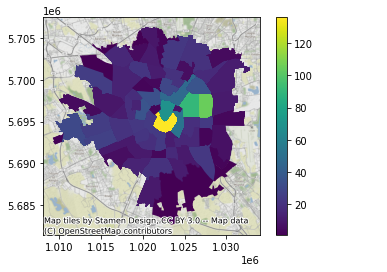

In [ ]:
ax = df_quartieri_areesosta_geom.to_crs(epsg=3857).plot(column="numero_aree",legend=True)
ctx.add_basemap(ax)

 - data una via (inserita dall'utente), avere le aree di sosta di quella via

In [ ]:
via = input("inserire nome via ")
df_areesosta_via = pd.merge(areesosta,stradario,how="inner",left_on="id_via", right_on="CODICE_VIA")
df_areesosta_via[df_areesosta_via.DESCRIZIONE_VIA == via]

inserire nome via ABBIATEGRASSO


,id_amat,id_via,num_civico,municipio,stato,categoriev,numero_man,stalli_per,stalli_tot,tipomanufa,ubicazione,geometry,CODICE_VIA,AREA,DESCRIZIONE_VIA,CIVICO,BARRATO,CAP,SEZIONE,MUNICIPIO
0,2,5339,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (9.17821 45.42991),5339,PZA,ABBIATEGRASSO,1,NaN,142,2066,5
1,2,5339,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (9.17821 45.42991),5339,PZA,ABBIATEGRASSO,2,NaN,142,2066,5
2,2,5339,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (9.17821 45.42991),5339,PZA,ABBIATEGRASSO,7,NaN,142,2066,5
3,2,5339,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (9.17821 45.42991),5339,PZA,ABBIATEGRASSO,8,NaN,142,2066,5
4,2,5339,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (9.17821 45.42991),5339,PZA,ABBIATEGRASSO,12,NaN,142,2066,5
5,2,5339,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (9.17821 45.42991),5339,PZA,ABBIATEGRASSO,14,NaN,142,2066,5
6,2,5339,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (9.17821 45.42991),5339,PZA,ABBIATEGRASSO,15,NaN,142,2066,5
